In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rc
import matplotlib as mat
import seaborn as sns
mat.rcParams.update({'font.size': 22})

ipv4A = [0] * 6
ipv6A = [0] * 6
ipv4B = [0] * 6
ipv6B = [0] * 6
r = [0,1,2,3,4,5]

for i in range(0,6):
    df_A = pd.read_table(f'../data/applications_silk_0{i+3}_A.csv', sep='|')
    df_A = df_A.groupby('ip version')[['bytes']].sum()
    ipv4A[i] = df_A['bytes'].values[0]
    ipv6A[i] = df_A['bytes'].values[1]
    df_B = pd.read_table(f'../data/applications_silk_0{i+3}_B.csv', sep='|')
    df_B = df_B.groupby('ip version')[['bytes']].sum()
    ipv4B[i] = df_B['bytes'].values[0]
    ipv6B[i] = df_B['bytes'].values[1]

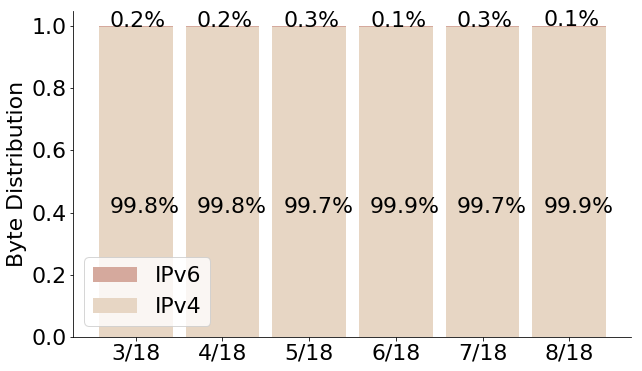

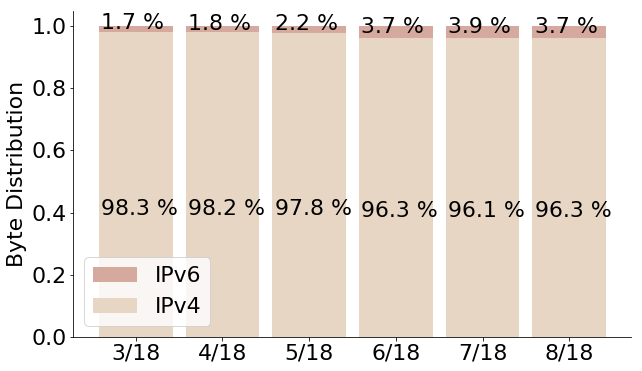

In [17]:
mat.rcParams.update({'font.size': 22})
totalA = [0] * 6
totalB = [0] * 6
for index in range(0,6):
    totalA[index] += ipv4A[index]
    totalA[index] += ipv6A[index]
    totalB[index] += ipv4B[index]
    totalB[index] += ipv6B[index]
    ipv4A[index] /= totalA[index]
    ipv6A[index] /= totalA[index]
    ipv4B[index] /= totalB[index]
    ipv6B[index] /= totalB[index]

names = ('3/18', '4/18', '5/18', '6/18', '7/18', '8/18')
barWidth = 0.85

plt.figure(figsize=(10,6))
sns.set_palette(sns.cubehelix_palette(start=.2))
bar0 = plt.bar(r, ipv4A, width=barWidth)
bar1 = plt.bar(r, ipv6A, bottom = ipv4A, width=barWidth)
ax = plt.gca()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height*100), (p.get_x()+.15*width, p.get_y()+.4*height))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(r, names)
plt.ylabel('Byte Distribution')
plt.legend((bar0,bar1)[::-1],('IPv4', 'IPv6')[::-1])
plt.show()

plt.figure(figsize=(10,6))
sns.set_palette(sns.cubehelix_palette(start=.2))
bar0 = plt.bar(r, ipv4B, width=barWidth)
bar1 = plt.bar(r, ipv6B, bottom = ipv4B, width=barWidth)
ax = plt.gca()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.1f} %'.format(height*100), (p.get_x()+.15*width-0.1, p.get_y()+.4*height))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(r, names)
plt.ylabel('Byte Distribution')
plt.legend((bar0, bar1)[::-1],('IPv4', 'IPv6')[::-1])
plt.show()